<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [16]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-12-08 18:44:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  46.1MB/s    in 0.8s    

2024-12-08 18:44:28 (46.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [17]:
%pip install --upgrade seaborn

import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Note: you may need to restart the kernel to use updated packages.


Import pandas module.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Demo: How to run an sql query


In [19]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [20]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [21]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [22]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


Text(0.5, 1.0, 'Histogram of ConvertedComp')

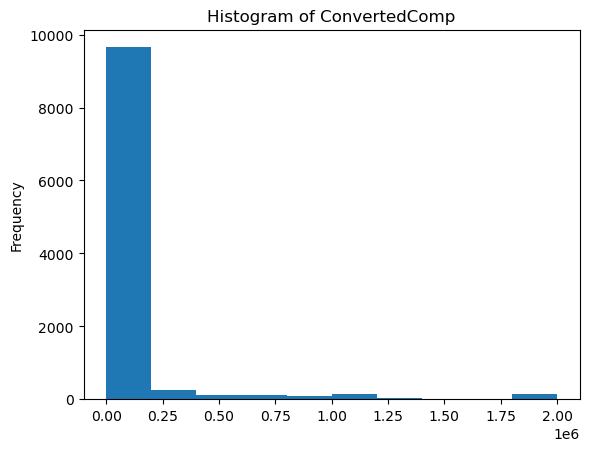

In [23]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt


QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df['ConvertedComp'].plot(kind='hist')
plt.title('Histogram of ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:xlabel='Age'>

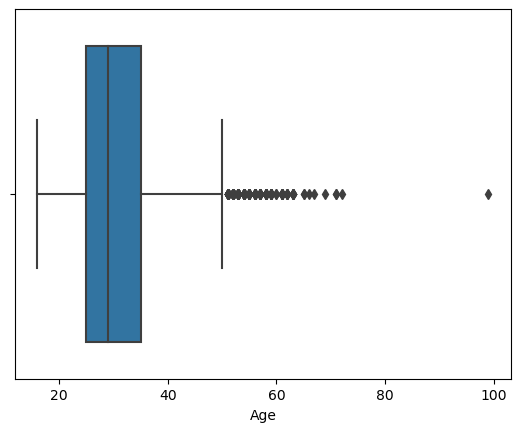

In [24]:
# your code goes here
QUERY = """
SELECT age as Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

import seaborn as sns
sns.boxplot(df['Age'])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0.5, 1.0, 'Relation between Age and Work Week Hours')

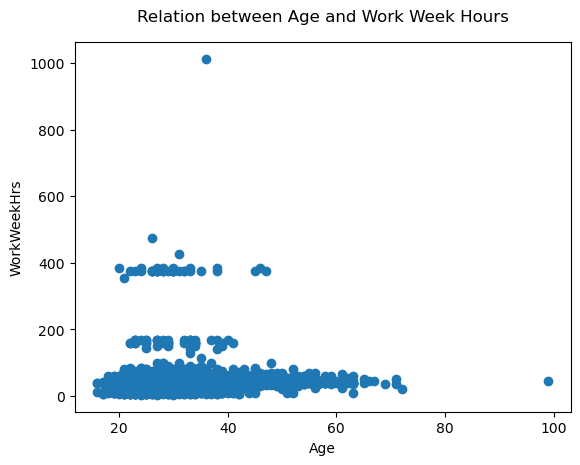

In [12]:
# your code goes here
QUERY = """
SELECT age as Age, WorkWeekHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

plt.scatter(df['Age'],df['WorkWeekHrs'])
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Relation between Age and Work Week Hours', pad=15)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<function matplotlib.pyplot.show(close=None, block=None)>

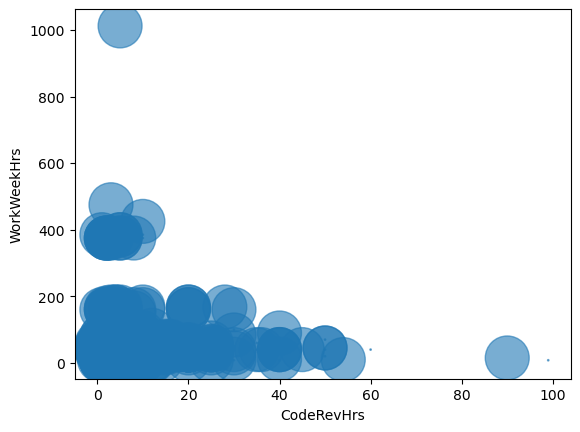

In [14]:
# your code goes here
QUERY = """
SELECT age as Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

plt.scatter(x=df['CodeRevHrs'],y=df['WorkWeekHrs'],s=df['Age'], alpha = 0.6, sizes=(1, 1000))
plt.xlabel('CodeRevHrs')
plt.ylabel('WorkWeekHrs')

plt.show


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


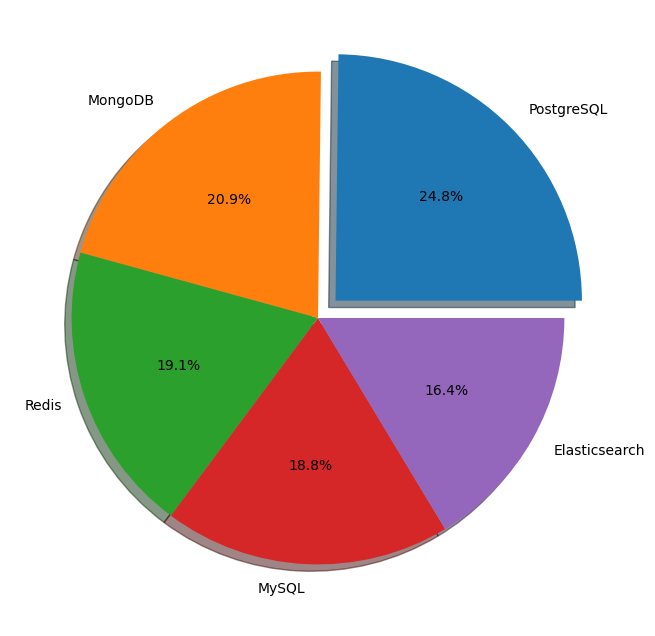

In [27]:
# your code goes here
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

data = df['count']
labels = df['DatabaseDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
plt.show()


   Respondent LanguageDesireNextYear  count
0           4             JavaScript   6630
1           9               HTML/CSS   5328
2          20                 Python   5239
3           4                    SQL   5012
4           9             TypeScript   4088


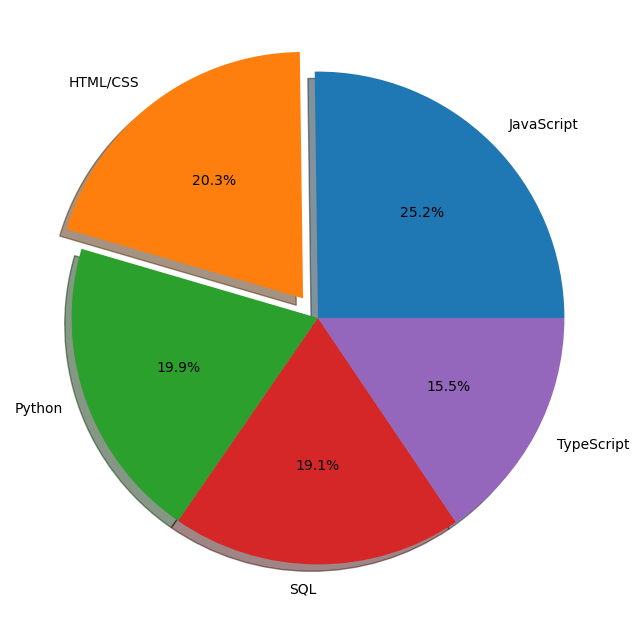

In [30]:

# In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['count']
labels = df['LanguageDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0, 0.1, 0, 0, 0), shadow = True)
plt.show()

   Respondent     LanguageWorkedWith  count
0           9             JavaScript   8687
1           9               HTML/CSS   7830
2           4                    SQL   7106
3           9  Bash/Shell/PowerShell   4642
4           4                 Python   4542


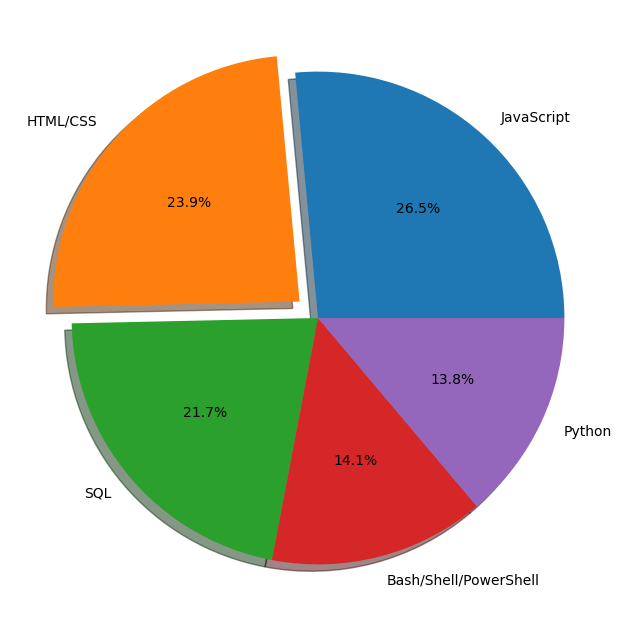

In [32]:
# How many respondents indicated that they currently work with 'SQL'?
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['count']
labels = df['LanguageWorkedWith']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0, 0.1, 0, 0, 0), shadow = True)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


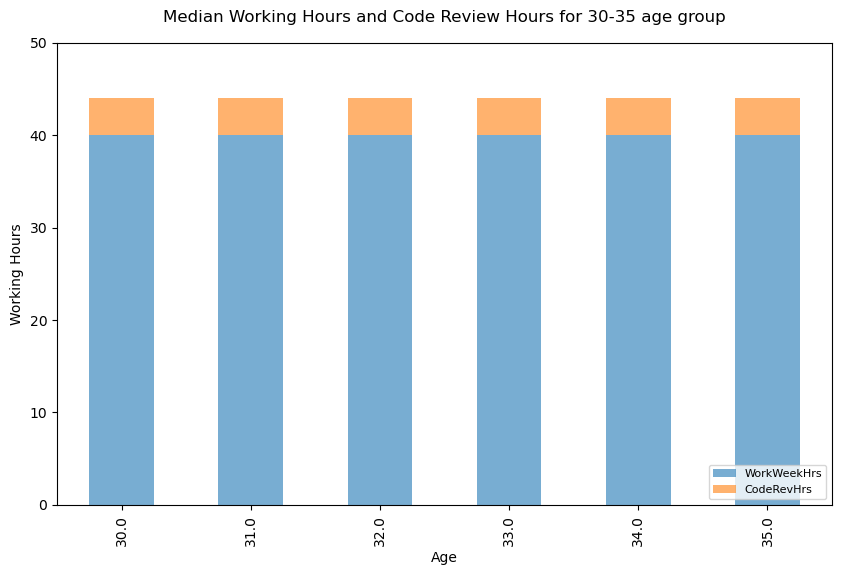

In [19]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)

df_age = df.groupby('Age').median()

df_age.plot(kind ='bar',
            stacked=True,
            figsize=(10, 6),
            alpha=0.6,
            ylim=(0,50)
           )

plt.title('Median Working Hours and Code Review Hours for 30-35 age group', pad=15)
plt.xlabel('Age')
plt.ylabel('Working Hours')
plt.legend(loc='lower right', fontsize=8)
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


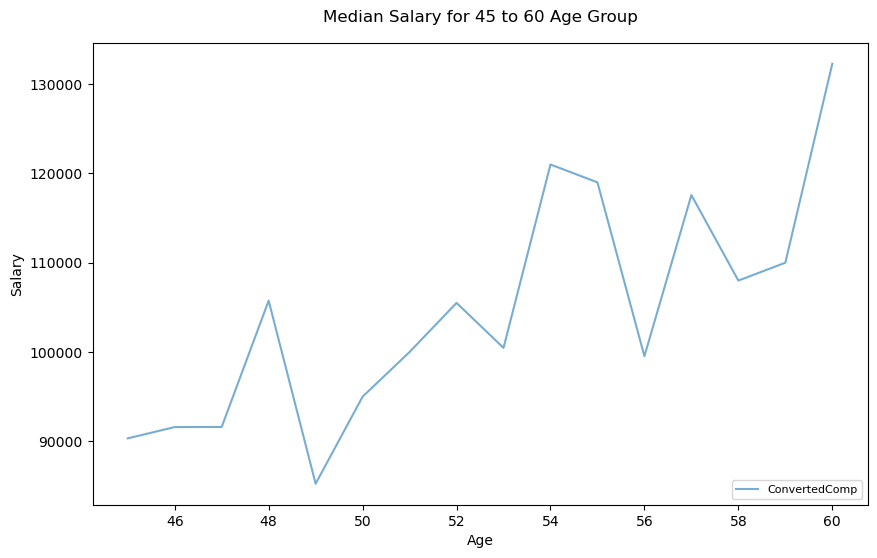

In [20]:
# your code goes here
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)

df_line = df.groupby('Age').median()

df_line.plot(kind ='line',
            figsize=(10, 6),
            alpha=0.6,
            )

plt.title('Median Salary for 45 to 60 Age Group', pad=15)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='lower right', fontsize=8) 
plt.show()


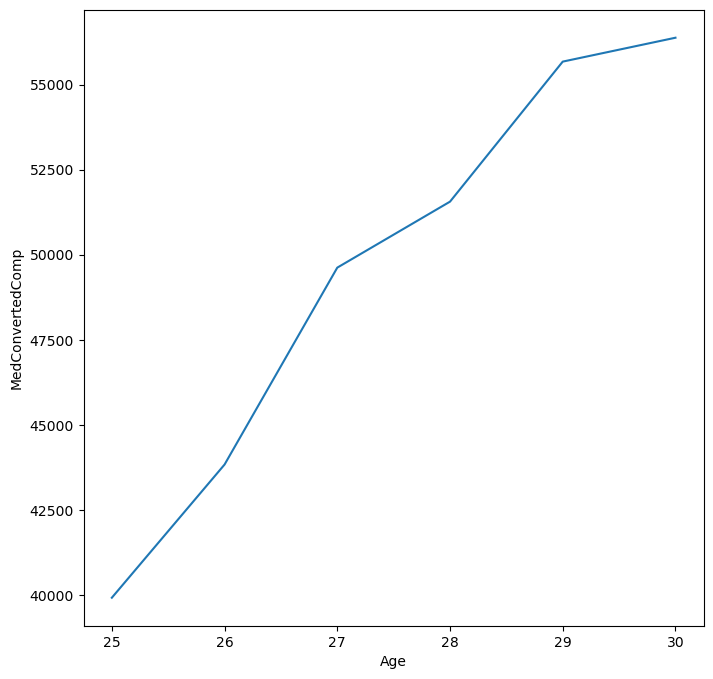

In [35]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30

"""
df = pd.read_sql_query(QUERY,conn)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


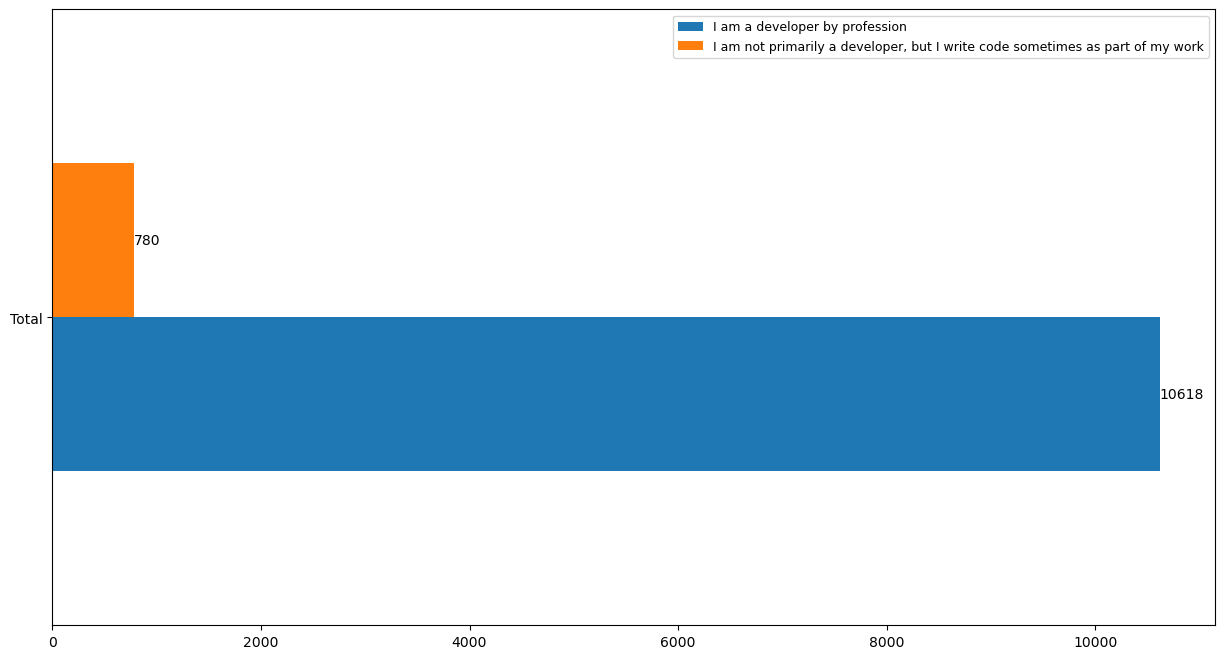

In [21]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""

df_bar = pd.read_sql_query(QUERY, conn)

df_bar[['Total']] = 1

newdf = df_bar.groupby('MainBranch', axis=0).sum().transpose()

ax = newdf.plot(kind='barh',
           figsize=(15, 8)
        )
plt.legend(loc='upper right', fontsize=9)
for container in ax.containers:
    ax.bar_label(container)


In [36]:
QUERY = """
SELECT DevType, COUNT(*) as Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC

"""
pd.read_sql_query(QUERY,conn)

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


Close the database connection.


In [28]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
